In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import random

In [2]:
#the function that set the general arranngements on income, theatre and cinema csv files.
def dataFrame(csv):
    df = pd.read_csv(csv, sep='|', skiprows=[2,3,13],index_col=0) #some of the rows skipped because they were useless.

    df = df.reset_index(drop=True)
    df.columns = df.iloc[0]

    df = df.drop(0)

    df.set_index(pd.Index(range(2014,2023)), inplace=True) #index adjusted from 2014 to 2022.

    df = df.iloc[:, 2:-1] #first two and last column were not used.

    df.index.name = 'Date'
    df.columns.name = 'Region'
    
    df = df.astype(float).astype(int) #string values changed into float than to integer.
    return df

In [3]:
#this function gives the df that presents ratio of cinema/theatre attendance to population.
def rate_by_population(df1,df2): #df1 is dataframe of number of cinema/theatre participation and df2 is dataframe of population by regions.
    
    rate_dict = {}
    rate_list=[]

    for i in range(12): #range is 12 because there are 12 different regions.
        key = df2.columns[i] #keys are region names.
        for j in range(9): #range is 9 because there are 9 years to examine.
            value = df1.iloc[j,i] / df2.iloc[j,i] #values are cinema/theatre participation number divided by population.
            rate_list.append(value) #value is added to the list.
            rate_dict[key] = rate_list #keys are matched with values.
        rate_list  = [] #list is emptied to use for other regions.

    df1 = pd.DataFrame(rate_dict) #rate by population dataframe has created.

    df1.set_index(pd.Index(range(2014,2023)), inplace=True)

    df1.index.name = 'Date'
    df1.columns.name = 'Region'

    return df1

In [4]:
#income values by regions.
income_df = dataFrame("income.csv")

In [5]:
#cinema attendance values by regions.
cinema_df = dataFrame("cinema.csv")

In [6]:
#theatre attendance values by regions.
theatre_df = dataFrame("theatre.csv")

In [7]:
#first five rows are skipped and columns are named.
population_df = pd.read_csv("population.csv", sep="|", skiprows=5, names=["Region","Population",""]) 

population_df = population_df.iloc[:, :-1] #last column skipped.

population_df = population_df.reset_index(drop=True)

pop_dict = {}
pop_list=[]

for region in range(12):
    key = population_df.loc[region,'Region']
    for pop in range(9):
        values = population_df.loc[region+12*pop,"Population"]
        pop_list.append(values)
    pop_dict[key] = pop_list
    pop_list = []


population_df = pd.DataFrame(pop_dict) #population dataframe has created.

population_df.set_index(pd.Index(range(2014,2023)), inplace=True) #index numbers are determined as years from 2014 to 2022.
population_df.index.name = 'Date' #index name determined.
population_df.columns.name = 'Region' #column name determined.
population_df = population_df.astype(float).astype(int) #population values converted to integer numbers.

#İstanbul-TR1 column is moved to the end to make population_df dataframe equal with other dataframes by order.
population_df = population_df[['Akdeniz-TR6', 'Batı Anadolu-TR5', 'Batı Karadeniz-TR8','Batı Marmara-TR2', 'Doğu Karadeniz-TR9', 'Doğu Marmara-TR4', 'Ege-TR3','Güneydoğu Anadolu-TRC', 'Kuzeydoğu Anadolu-TRA','Orta Anadolu-TR7', 'Ortadoğu Anadolu-TRB', 'İstanbul-TR1']]

In [8]:
theatre_rate_df = rate_by_population(theatre_df,population_df) #theatre participation rate has converted into theatre_rate_df.
cinema_rate_df = rate_by_population(cinema_df,population_df) #cinema participation rate has converted into cinema_rate_df.

In [9]:
#averages of income, cinema, theatre values for all nine years have found by regions to use with plots.

income_averages = income_df.mean()
cinema_averages = cinema_rate_df.mean()
theatre_averages = theatre_rate_df.mean()

#total_averages gives the average value of cinema and theatre attendance ratio.
total_averages = (cinema_averages + theatre_averages)/2

In [10]:
#dataframe columns are income values and theatre+cinema averages
df = pd.DataFrame({'Income': income_averages, 'Total': total_averages})

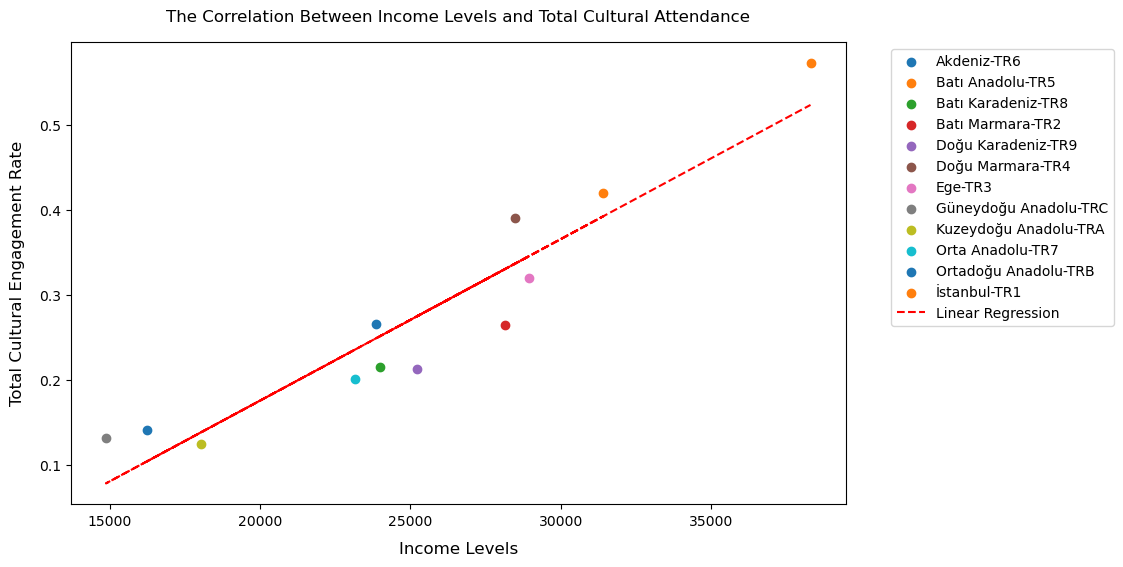

Slope of the linear regression line: 1.9016012485187965e-05


In [11]:
plt.figure(figsize=(10, 6))

for region, x, y in zip(df.index, income_averages, total_averages):
    plt.scatter(x, y, label=region)

# linear regression
z = np.polyfit(income_averages, total_averages, 1)
p = np.poly1d(z)
plt.plot(income_averages, p(income_averages), "r--", label="Linear Regression")

# Set plot labels and title
plt.xlabel('Income Levels', labelpad=10, fontsize=12) #label name distances and font-sizes are changed.
plt.ylabel('Total Cultural Engagement Rate', labelpad=10, fontsize=12)
plt.title('The Correlation Between Income Levels and Total Cultural Attendance', pad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

slope, intercept = np.polyfit(income_averages, total_averages, 1)

# 'slope' contains the slope of the linear regression line

print("Slope of the linear regression line:", slope)

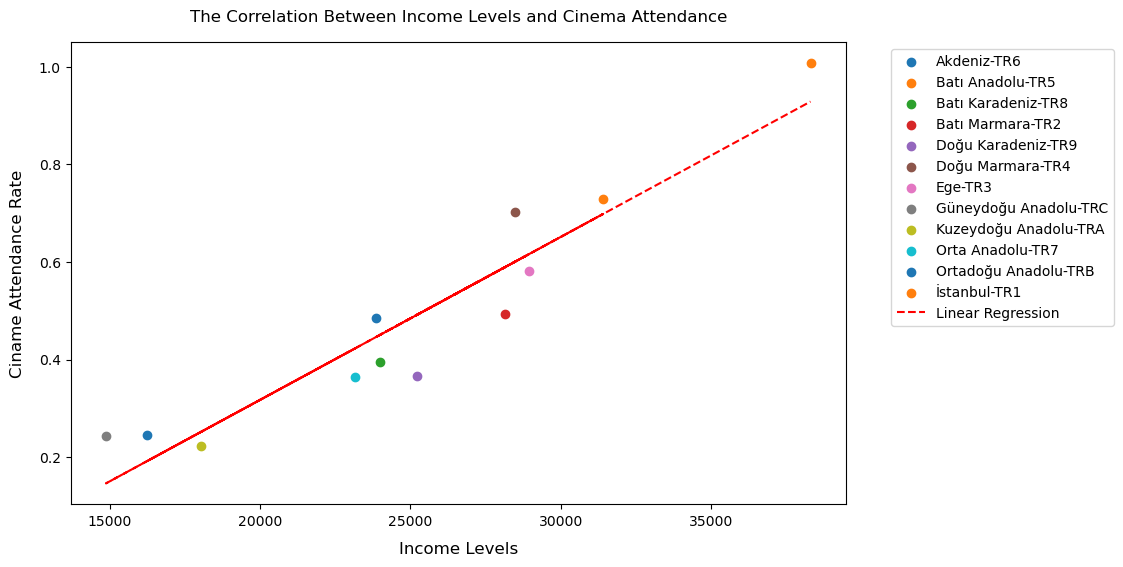

Slope of the linear regression line: 3.34167107654203e-05


In [12]:
plt.figure(figsize=(10, 6))

#scatter plot is used.
for region, x, y in zip(df.index, income_averages, cinema_averages):
    plt.scatter(x, y, label=region)

#linear regression
z = np.polyfit(income_averages, cinema_averages, 1)
p = np.poly1d(z)
plt.plot(income_averages, p(income_averages), "r--", label="Linear Regression")


plt.xlabel('Income Levels', labelpad=10, fontsize=12) #label name distances and font-sizes are changed.
plt.ylabel('Ciname Attendance Rate', labelpad=10, fontsize=12)
plt.title('The Correlation Between Income Levels and Cinema Attendance', pad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show() #plot is shown.

slope, intercept = np.polyfit(income_averages, cinema_averages, 1)

#slope value gives slope of the linear regression line

print("Slope of the linear regression line:", slope)

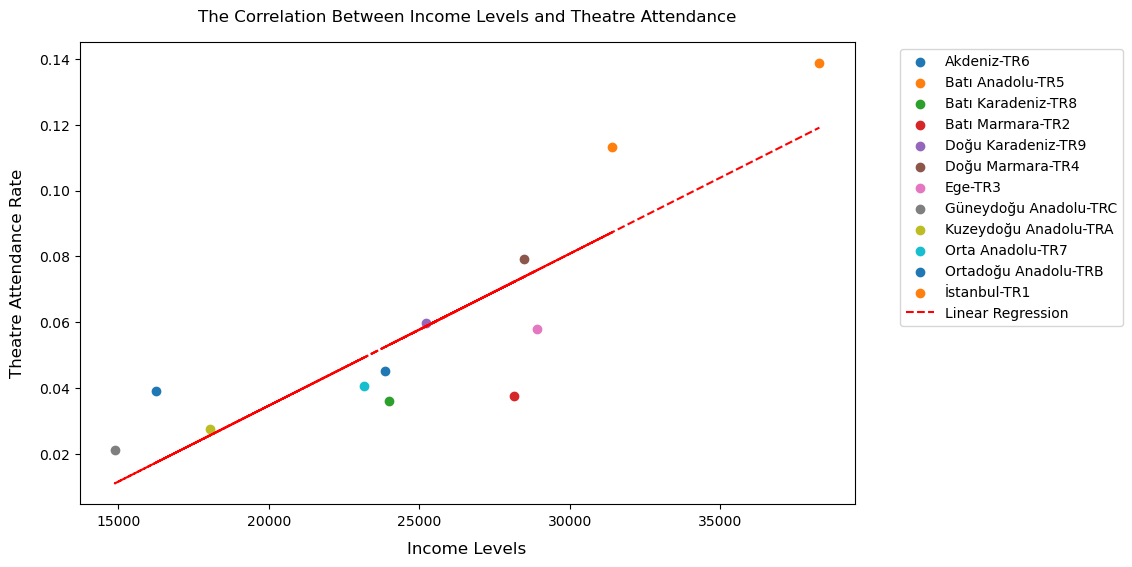

Slope of the linear regression line: 4.615314204955621e-06


In [13]:
plt.figure(figsize=(10, 6))

# Scatter plot or line plot
for region, x, y in zip(df.index, income_averages, theatre_averages):
    plt.scatter(x, y, label=region)

# Linear regression
z = np.polyfit(income_averages, theatre_averages, 1)
p = np.poly1d(z)
plt.plot(income_averages, p(income_averages), "r--", label="Linear Regression")

# Set plot labels and title
plt.xlabel('Income Levels', labelpad=10, fontsize=12) #label name distances and font-sizes are changed.
plt.ylabel('Theatre Attendance Rate', labelpad=10, fontsize=12)
plt.title('The Correlation Between Income Levels and Theatre Attendance', pad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

slope, intercept = np.polyfit(income_averages, theatre_averages, 1)

# 'slope' contains the slope of the linear regression line

print("Slope of the linear regression line:", slope)

In [14]:
#average of theatre and cinema rate values are placed into dataframe.
avg_dict = {}
avg_list=[]

for i in range(12):
    key = population_df.columns[i] #keys are regions.
    for j in range(9): 
        value = (theatre_rate_df.iloc[j,i] + cinema_rate_df.iloc[j,i])/2 #values are averages of cinema and theatre participation ratio.
        avg_list.append(value)
        avg_dict[key] = avg_list
    avg_list  = []

total_averages_df = pd.DataFrame(avg_dict)

total_averages_df.set_index(pd.Index(range(2014,2023)), inplace=True)

total_averages_df.index.name = 'Date'
total_averages_df.columns.name = 'Region'

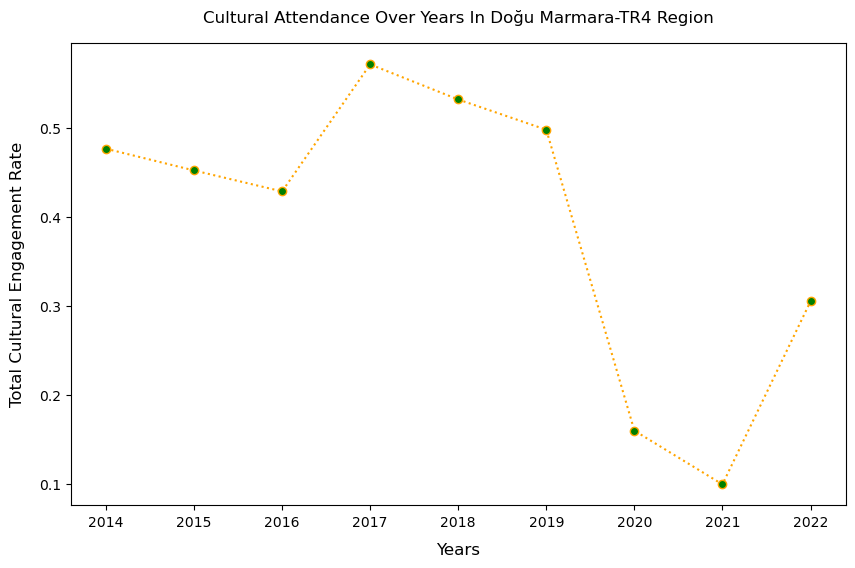

In [15]:
#region list to select a random region.
regions_list = ['Akdeniz-TR6', 'Batı Anadolu-TR5', 'Batı Karadeniz-TR8',
       'Batı Marmara-TR2', 'Doğu Karadeniz-TR9', 'Doğu Marmara-TR4', 'Ege-TR3',
       'Güneydoğu Anadolu-TRC', 'Kuzeydoğu Anadolu-TRA', 'Orta Anadolu-TR7',
       'Ortadoğu Anadolu-TRB', 'İstanbul-TR1']

random_region = random.choice(regions_list)
#random region will be choosen from regions_list.

plt.figure(figsize=(10, 6))

#x axis will be years from 2014 to 2022 and y axis will be average of total of cinema and theatre attendance ratios.
plt.plot(list(range(2014,2023)), total_averages_df[random_region], marker="o", linestyle=':', color="orange", markerfacecolor="green")

plt.xlabel('Years', labelpad=10, fontsize=12) #label names are taken away from graph with labelpad attribute.
plt.ylabel('Total Cultural Engagement Rate', labelpad=10, fontsize=12)
plt.title("Cultural Attendance Over Years In " + random_region + " Region", pad=15)
plt.show() #plot is shown.

In [16]:
turkey_geo = gpd.read_file(r'TUR_adm/TUR_adm1.shp') #read the Turkey shapefile into a geodataframe.

turkey = turkey_geo[["NAME_1","geometry"]] #select only the "NAME_1" and "geometry" columns from the Turkey geodataframe.
turkey.rename(columns={"NAME_1":"Province"},inplace=True) #rename the "NAME_1" column to "Province" in the Turkey geodataframe.

#dictionary that includes all provinces with their regions. (they are all written manually.)
region_mapping = {
    'Akdeniz-TR6': ['Antalya', 'Mersin', 'Adana', 'Burdur', 'Hatay', 'Isparta', 'K. Maras', 'Osmaniye'],
    'Batı Anadolu-TR5': ['Ankara', 'Konya', 'Karaman'],
    'Batı Karadeniz-TR8': ['Bartın', 'Karabük', 'Kastamonu', 'Zinguldak', 'Çankiri', 'Sinop', 'Samsun', 'Tokat', 'Çorum', 'Amasya'],
    'Batı Marmara-TR2': ['Edirne', 'Tekirdag', 'Çanakkale', 'Kirklareli', 'Balikesir'],
    'Doğu Karadeniz-TR9': ['Trabzon', 'Rize', 'Artvin', 'Giresun', 'Ordu', 'Gümüshane'],
    'Doğu Marmara-TR4': ['Kocaeli', 'Sakarya', 'Yalova', 'Bilecik', 'Bolu', 'Düzce', 'Bursa', 'Eskisehir'],
    'Ege-TR3': ['Izmir', 'Aydin', 'Manisa', 'Mugla', 'Denizli', 'Afyon', 'Usak', 'Kütahya'],
    'Güneydoğu Anadolu-TRC': ['Adiyaman', 'Batman', 'Diyarbakir', 'Mardin', 'Sanliurfa', 'Siirt', 'Sirnak', 'Kilis', 'Gaziantep'],
    'Kuzeydoğu Anadolu-TRA': ['Erzurum', 'Erzincan', 'Bayburt', 'Ardahan', 'Agri', 'Kars', 'Igdir'],
    'Orta Anadolu-TR7': ['Nevsehir', 'Aksaray', 'Kinkkale', 'Kirsehir', 'Nigde', 'Kayseri', 'Sivas', 'Yozgat'],
    'Ortadoğu Anadolu-TRB': ['Malatya', 'Elazığ', 'Bingöl', 'Tunceli', 'Van', 'Mus', 'Bitlis', 'Hakkari'],
    'İstanbul-TR1': ['Istanbul'],
    'Other': [] 
}


#assigning regions based on predefined mapping
#region column has created than every provinces are replaced into region columns.
for region, provinces in region_mapping.items():
    turkey.loc[turkey['Province'].isin(provinces), 'Region'] = region


C:\Users\oztun\AppData\Local\Temp\ipykernel_12116\54985503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.rename(columns={"NAME_1":"Province"},inplace=True) #rename the "NAME_1" column to "Province" in the Turkey geodataframe.
C:\Users\oztun\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [17]:
data = pd.DataFrame({'Income Average': income_averages, 'Cinema Average': cinema_averages, 'Theatre Average': theatre_averages, 'Total Average': total_averages})

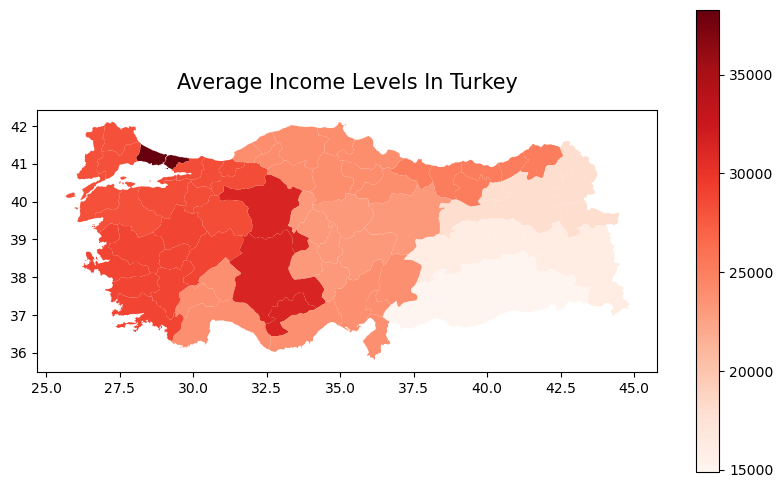

In [18]:
#merge income data with geographical data
merged_income_df = pd.merge(turkey, data, left_on='Region', right_index=True, how='left')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_income_df.plot(column='Income Average', cmap='Reds', legend=True, ax=ax,)
plt.title("Average Income Levels In Turkey", fontsize=15, pad=15)
plt.show()


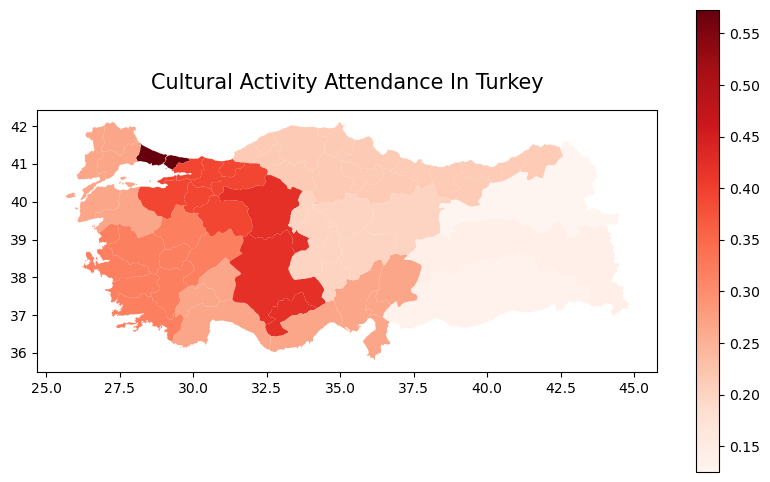

In [19]:
#merge total cultural engegament data with geographical data
merged_total_df = pd.merge(turkey, data, left_on='Region', right_index=True, how='left')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_total_df.plot(column='Total Average', cmap='Reds', legend=True, ax=ax,)
plt.title("Cultural Activity Attendance In Turkey", fontsize=15, pad=15)
plt.show()